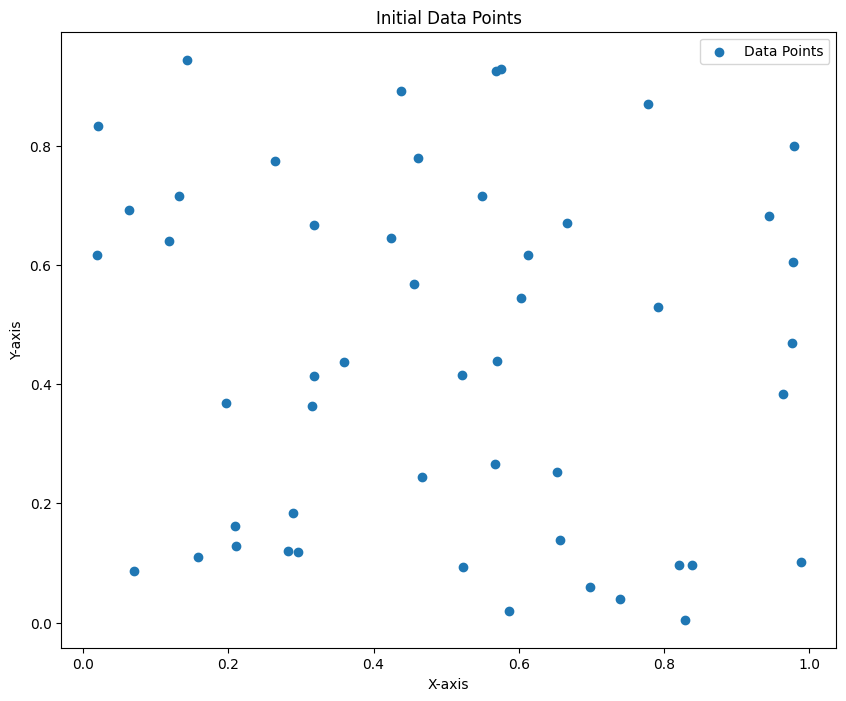

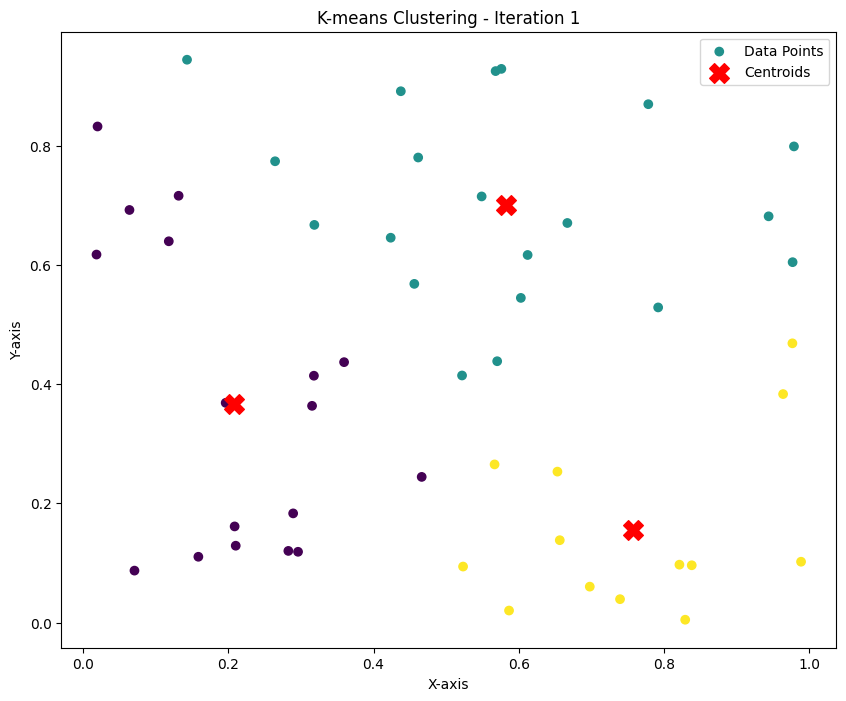

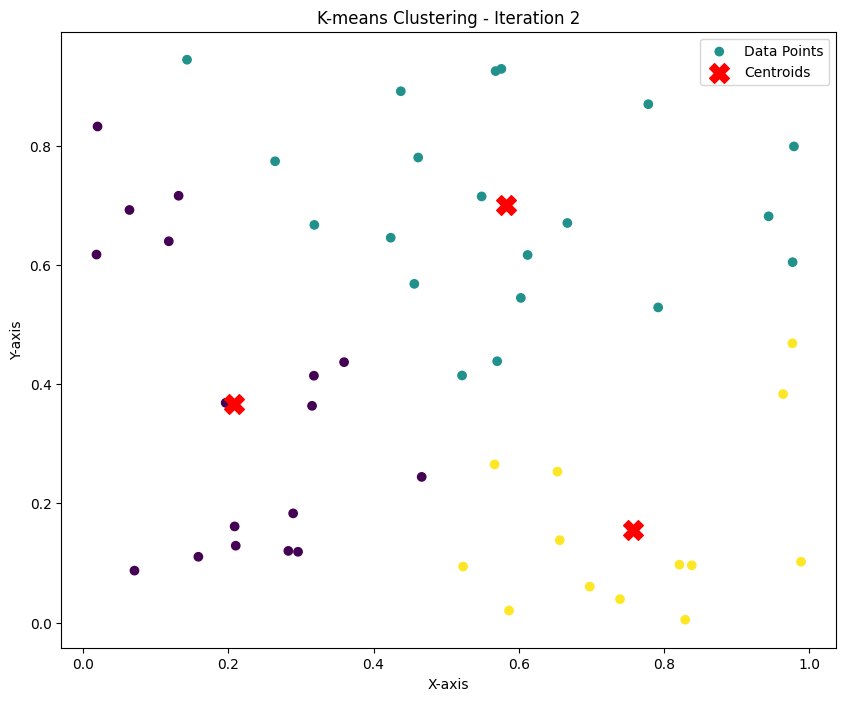

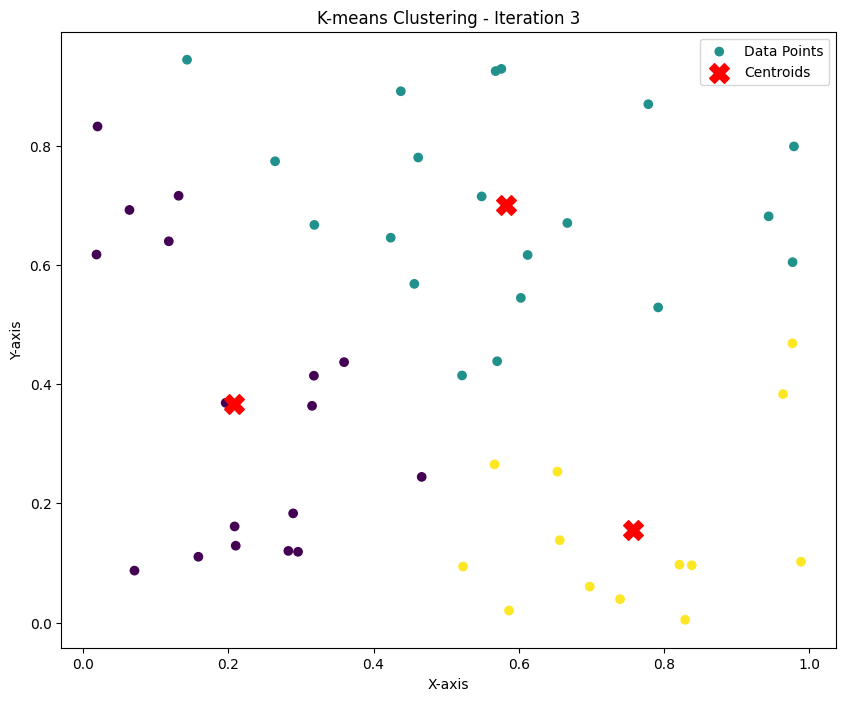

In [4]:
# prompt: generate 50 points in 2 dimensions. Show the data on 2 d plane. generate a code to apply k-means algorithm on the data with k=3. Show the 3 iterations of the clustering with 3 clusters in different colours

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate 50 random points in 2D
np.random.seed(0)  # for reproducibility
X = np.random.rand(50, 2)

# Plot the initial data points
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], label='Data Points')
plt.title('Initial Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


# Apply K-means clustering with k=3 and visualize iterations
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=3, n_init=1)  # Limit to 3 iterations for visualization

# List to store cluster assignments for each iteration
cluster_history = []

# Iterate through k-means steps (3 iterations)
for i in range(3):
  kmeans.fit(X)
  cluster_history.append(kmeans.labels_)
  centroids = kmeans.cluster_centers_

  # Plot data points with cluster assignments for the current iteration
  plt.figure(figsize=(10, 8))
  plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', label='Data Points')
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')  #Plot centroids
  plt.title(f'K-means Clustering - Iteration {i+1}')
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.legend()
  plt.show()


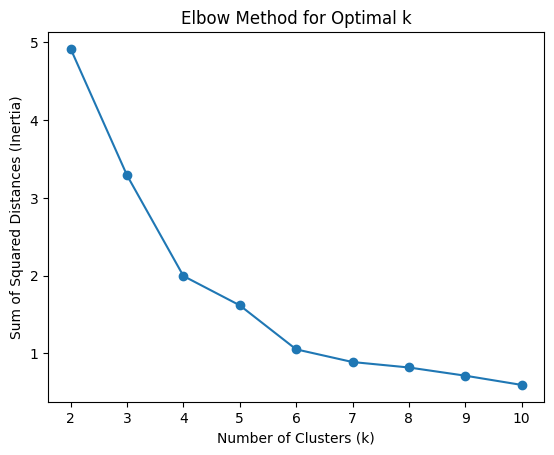

In [5]:
# prompt: Now for the above generated same data apply k-means with different values of k=2,3,4,5,6,7,8,9,10 and plot k vs  sum of squared euclidean distances of points to their nearest centres

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X' is your data from the previous code
# If not, replace this with your actual data

inertias = []
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()


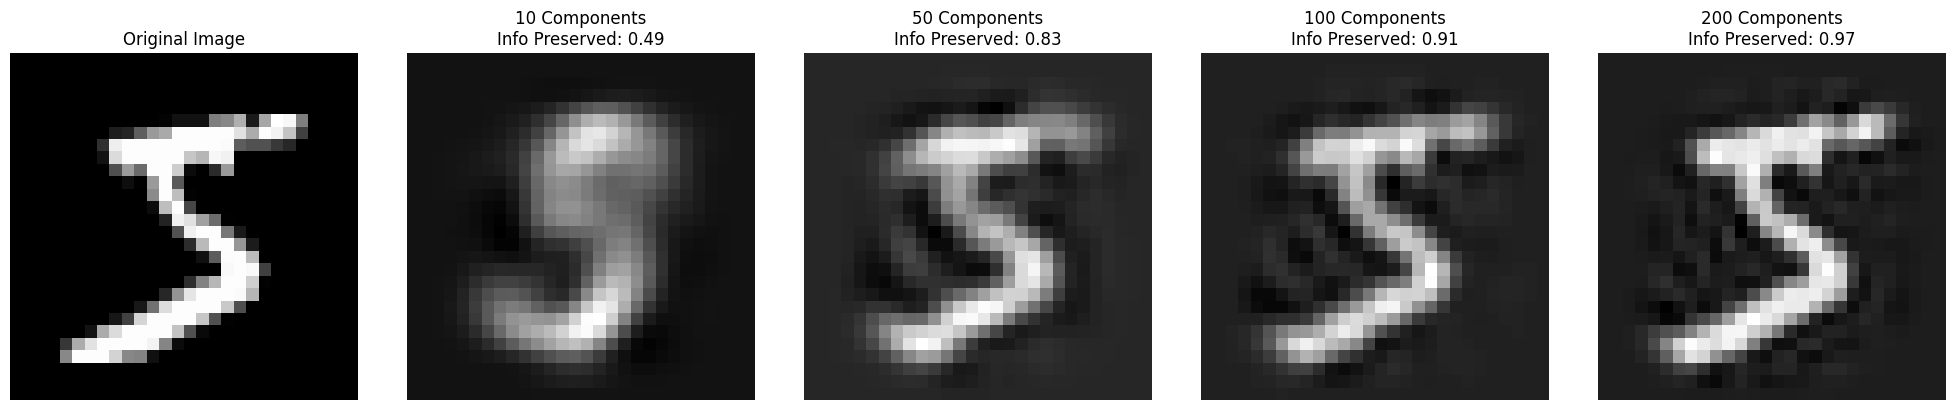

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)  # Load as NumPy arrays
X = mnist.data
y = mnist.target

# Find all indices where the digit is 5
indices_five = np.where(y == '5')[0]  # Get the indices as a 1D array

# Select one image of digit 5
selected_image_index = indices_five[0]  # Select the first index from the array
image = X[selected_image_index].reshape(28, 28)  # Access row by index and reshape

# Apply PCA with different number of components
n_components_values = [10, 50, 100, 200]
fig, axes = plt.subplots(1, len(n_components_values) + 1, figsize=(20, 4))

# Plot the original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, n_components in enumerate(n_components_values):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    projected_image = pca.inverse_transform(X_pca[selected_image_index]).reshape(28, 28)
    variance_ratio = np.sum(pca.explained_variance_ratio_)

    axes[i + 1].imshow(projected_image, cmap='gray')
    axes[i + 1].set_title(f'{n_components} Components\nInfo Preserved: {variance_ratio:.2f}')
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()